# Summer Olympics (1896-2024)

In [2]:
#Import the necessary packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


In [3]:
raw_data_df = pd.read_csv('Data/olympics_dataset.csv')
raw_data_df.head()

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
0,0,A Dijiang,M,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,1,A Lamusi,M,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal
2,2,Gunnar Aaby,M,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,No medal
3,3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,26,Cornelia (-strannood),F,Netherlands,NED,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No medal


*Dataset downloaded from Kaggle : https://www.kaggle.com/datasets/stefanydeoliveira/summer-olympics-medals-1896-2024*

<br> Features:

- **player_id** : Unique identifier for each athlete.
- **Name** : Name of the athlete.
- **Sex** : Gender of the athlete (Male (M) /Female (F)).
- **Team** : Country the athlete represented.
- **NOC** : National Olympic Committee code for the country.
- **Year** : Year of the Olympic Games.
- **Season** : Season of the Olympic Games (Summer).
- **City** : Host city of the Olympic Games.
- **Sport** : Sport category in which the athlete competed.
- **Event** : Specific event within the sport.
- **Medal** : Type of medal awarded (Gold, Silver, Bronze) or "No medal" if not awarded.

<br>***Idea to go further** : check the code for cleaning the names because some are not cleaned properly, namely due to nicknames within parenthesis*

## Quality Check/EDA

Although data is said to be cleaned and ready for use, it's always a good idea to perform some sanity checks and exploratoraty analyses in order to better understand it before starting the proper analyses

Ideas of checks/analyses to perform : 

- Missing values
- Player_id field : unique identifier
- Team VS NOC fields
- Row level
- Dataset accuracy - comparison with official results


### Missing Values

In [4]:
#We can clearly see that the dataset is indeed complete, there is no missing/null data
raw_data_df.isna().sum()

player_id    0
Name         0
Sex          0
Team         0
NOC          0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal        0
dtype: int64

### Player ID Field

In [5]:
#Be careful with the player_id which is in fact only unique for 2024 games!
raw_data_df[raw_data_df.Name == 'Simone Biles']

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
18235,21758,Simone Biles,F,United States,USA,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Women's Individual All-Around,Gold
18236,21759,Simone Biles,F,United States,USA,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Women's Team All-Around,Gold
18237,21760,Simone Biles,F,United States,USA,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Women's Floor Exercise,Gold
18238,21761,Simone Biles,F,United States,USA,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Women's Horse Vault,Gold
18239,21762,Simone Biles,F,United States,USA,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Women's Uneven Bars,No medal
18240,21763,Simone Biles,F,United States,USA,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Women's Balance Beam,Bronze
223903,1351,Simone Biles,F,United States,USA,2020,Summer,Tokyo,Artistic Gymnastics,Women's All-Around,No medal
223904,1352,Simone Biles,F,United States,USA,2020,Summer,Tokyo,Artistic Gymnastics,Women's Vault,No medal
223905,1353,Simone Biles,F,United States,USA,2020,Summer,Tokyo,Artistic Gymnastics,Women's Uneven Bars,No medal
223906,1354,Simone Biles,F,United States,USA,2020,Summer,Tokyo,Artistic Gymnastics,Women's Balance Beam,Bronze


### Team/NOC Fields

In [6]:
raw_data_df.groupby('NOC').Team.nunique().sort_values(ascending=False).reset_index().head(10)

,NOC,Team
0,FRA,160
1,USA,97
2,GBR,96
3,SWE,52
4,NOR,46
5,GER,43
6,ITA,35
7,CAN,31
8,DEN,29
9,GRE,29


In [7]:
#Better to consider the NOC field than the team field
raw_data_df[raw_data_df.NOC == 'FRA'][['Team', 'NOC']].drop_duplicates()

,Team,NOC
48,France,FRA
1474,France-1,FRA
2395,Union des Socits Franais de Sports Athletiques,FRA
3570,France-3,FRA
3590,Martha-27,FRA
...,...,...
195446,Singy-7,FRA
196710,Mac Miche,FRA
196713,Camille,FRA
211126,Freia-19,FRA


### Row Level

In [8]:
#We can cleary see that there is one row per athlete and not one row per team/event
mask = (raw_data_df.Year == 2024) & (raw_data_df.Medal == 'Gold') & (raw_data_df.Sport == 'Football') & (raw_data_df.Team == 'Spain')
raw_data_df[mask].head(10)

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
247775,1942033,Alex Baena,M,Spain,ESP,2024,Summer,Paris,Football,Men,Gold
247776,1942037,Pablo Barrios,M,Spain,ESP,2024,Summer,Paris,Football,Men,Gold
247777,1942039,Adrian Bernabe,M,Spain,ESP,2024,Summer,Paris,Football,Men,Gold
247778,1942046,Sergio Camello,M,Spain,ESP,2024,Summer,Paris,Football,Men,Gold
247779,1942056,Pau Cubarsi,M,Spain,ESP,2024,Summer,Paris,Football,Men,Gold
247780,1942076,Eric Garcia,M,Spain,ESP,2024,Summer,Paris,Football,Men,Gold
247781,1942077,Joan Garcia,M,Spain,ESP,2024,Summer,Paris,Football,Men,Gold
247782,1942089,Sergio Gomez,M,Spain,ESP,2024,Summer,Paris,Football,Men,Gold
247783,1942099,Miguel Gutierrez,M,Spain,ESP,2024,Summer,Paris,Football,Men,Gold
247784,1942104,Alejandro Iturbe,M,Spain,ESP,2024,Summer,Paris,Football,Men,Gold


### Dataset Accuracy
*To compare with the official results we need an event-level dataset instead of an individual-level dataset*

In [9]:
sex_olympic_df = raw_data_df[['Sex', 'NOC', 'Year', 'Sport', 'Event','Medal']].drop_duplicates()
sex_olympic_df

,Sex,NOC,Year,Sport,Event,Medal
0,M,CHN,1992,Basketball,Basketball Men's Basketball,No medal
1,M,CHN,2012,Judo,Judo Men's Extra-Lightweight,No medal
2,M,DEN,1920,Football,Football Men's Football,No medal
3,M,DEN,1900,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,F,NED,1932,Athletics,Athletics Women's 100 metres,No medal
...,...,...,...,...,...,...
252545,F,USA,2024,Athletics,Women's 400m Hurdles,No medal
252555,M,LAO,2024,Swimming,Men's 100m Breaststroke,No medal
252558,F,UKR,2024,Judo,Women +78 kg,No medal
252560,F,GEQ,2024,Athletics,Women's 100m,No medal


In [10]:
sex_olympic_df = pd.concat([sex_olympic_df.loc[:,'Sex':'Event'],pd.get_dummies(sex_olympic_df.Medal,dtype=int)[['Bronze', 'Silver','Gold']]], axis=1)
sex_olympic_df

,Sex,NOC,Year,Sport,Event,Bronze,Silver,Gold
0,M,CHN,1992,Basketball,Basketball Men's Basketball,0,0,0
1,M,CHN,2012,Judo,Judo Men's Extra-Lightweight,0,0,0
2,M,DEN,1920,Football,Football Men's Football,0,0,0
3,M,DEN,1900,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,0,1
4,F,NED,1932,Athletics,Athletics Women's 100 metres,0,0,0
...,...,...,...,...,...,...,...,...
252545,F,USA,2024,Athletics,Women's 400m Hurdles,0,0,0
252555,M,LAO,2024,Swimming,Men's 100m Breaststroke,0,0,0
252558,F,UKR,2024,Judo,Women +78 kg,0,0,0
252560,F,GEQ,2024,Athletics,Women's 100m,0,0,0


### 2024 Crosscheck

In [11]:
(sex_olympic_df[sex_olympic_df.Year == 2024]
 .groupby('NOC')
 .agg({'Gold':'sum', 'Silver':'sum', 'Bronze':'sum'})
 .sort_values(by=['Gold','Silver','Bronze'], ascending=[False, False, False])
 .head(10))

,Gold,Silver,Bronze
NOC,,,
CHN,43,29,25
USA,40,45,42
JPN,20,14,14
AUS,18,18,18
FRA,17,26,22
NED,16,8,12
GBR,14,22,31
ITA,14,11,13
KOR,14,11,12


If we compare to official results from the Olympics website (https://olympics.com/fr/paris-2024/medailles), we can see some discrepencies between the results above and the official ones. This is in fact due to mixed events that are still represented two times (one time for each sex) since we took into account the 'Sex' field in the groupby. We can now try to groupby without taking into account this field.

In [12]:
olympic_df = raw_data_df[['NOC', 'Year', 'Sport', 'Event','Medal']].drop_duplicates()
olympic_df

,NOC,Year,Sport,Event,Medal
0,CHN,1992,Basketball,Basketball Men's Basketball,No medal
1,CHN,2012,Judo,Judo Men's Extra-Lightweight,No medal
2,DEN,1920,Football,Football Men's Football,No medal
3,DEN,1900,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,NED,1932,Athletics,Athletics Women's 100 metres,No medal
...,...,...,...,...,...
252545,USA,2024,Athletics,Women's 400m Hurdles,No medal
252555,LAO,2024,Swimming,Men's 100m Breaststroke,No medal
252558,UKR,2024,Judo,Women +78 kg,No medal
252560,GEQ,2024,Athletics,Women's 100m,No medal


In [13]:
olympic_df = pd.concat([olympic_df.loc[:,'NOC':'Event'],pd.get_dummies(olympic_df.Medal,dtype=int)[['Bronze', 'Silver','Gold']]], axis=1)
olympic_df

,NOC,Year,Sport,Event,Bronze,Silver,Gold
0,CHN,1992,Basketball,Basketball Men's Basketball,0,0,0
1,CHN,2012,Judo,Judo Men's Extra-Lightweight,0,0,0
2,DEN,1920,Football,Football Men's Football,0,0,0
3,DEN,1900,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,0,1
4,NED,1932,Athletics,Athletics Women's 100 metres,0,0,0
...,...,...,...,...,...,...,...
252545,USA,2024,Athletics,Women's 400m Hurdles,0,0,0
252555,LAO,2024,Swimming,Men's 100m Breaststroke,0,0,0
252558,UKR,2024,Judo,Women +78 kg,0,0,0
252560,GEQ,2024,Athletics,Women's 100m,0,0,0


In [14]:
(olympic_df[olympic_df.Year == 2024]
 .groupby('NOC')
 .agg({'Gold':'sum', 'Silver':'sum', 'Bronze':'sum'})
 .sort_values(by=['Gold','Silver','Bronze'], ascending=[False, False, False])
 .head(10))

,Gold,Silver,Bronze
NOC,,,
CHN,40,27,24
USA,39,42,41
JPN,20,12,13
AUS,18,18,16
FRA,16,26,22
NED,15,7,12
GBR,13,22,28
KOR,13,9,10
ITA,12,11,13


We can still notice discrepencies with the official results. This is due to the athletes with double disciplines in the 'Sport' field as we can see with the two examples below. Kristen Faulkner has actually won gold in both her individual and team races while Gregorio Paltrinieri has won silver on 'Men's 1500m Freestyle' and bronze on 'Men's 800m Freestyle'.

In [15]:
mask = (raw_data_df.Name.str.contains('Faulkner')) & (raw_data_df.Year == 2024)
raw_data_df[mask]

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
249577,1955081,Kristen Faulkner,F,United States,USA,2024,Summer,Paris,"Cycling Road, Cycling Track",Women's Road Race,No medal
249578,1955081,Kristen Faulkner,F,United States,USA,2024,Summer,Paris,"Cycling Road, Cycling Track",Women's Team Pursuit,No medal


In [16]:
mask = (raw_data_df.Name.str.contains('Paltrinieri')) & (raw_data_df.Year == 2024)
raw_data_df[mask]

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
245776,1925630,Gregorio Paltrinieri,M,Italy,ITA,2024,Summer,Paris,"Marathon Swimming, Swimming",Men's 10km,No medal
245777,1925630,Gregorio Paltrinieri,M,Italy,ITA,2024,Summer,Paris,"Marathon Swimming, Swimming",Men's 1500m Freestyle,No medal
245778,1925630,Gregorio Paltrinieri,M,Italy,ITA,2024,Summer,Paris,"Marathon Swimming, Swimming",Men's 800m Freestyle,No medal


Since the code used to create the Olympics dataset based on two others ones was available (https://www.kaggle.com/code/stefanydeoliveira/olympics-analysis), I updated it to get the right results for 2024. To keep it short, the issue came from taking into account the 'Sport' field in the merging process between the athletes dataframe and the medals dataframe which do not match since one event can only belong to one sport.

In [17]:
raw_data_df_updated = pd.read_csv('Data/olympics_dataset_updated.csv')
raw_data_df_updated

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
0,0,A Dijiang,M,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,1,A Lamusi,M,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal
2,2,Gunnar Aaby,M,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,No medal
3,3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,26,Cornelia (-strannood),F,Netherlands,NED,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No medal
...,...,...,...,...,...,...,...,...,...,...,...
252574,4982175,Elijah Joseph,M,Trinidad and Tobago,TTO,2024,Summer,Paris,Athletics,Men's 4 x 400m Relay,No medal
252575,4982762,Khrystyna Homan,F,Ukraine,UKR,2024,Summer,Paris,Judo,Women +78 kg,No medal
252576,4983537,Chemengich Chelangat,F,Uganda,UGA,2024,Summer,Paris,Athletics,"Women's 10,000m",No medal
252577,4986655,Sefora Ada,F,Equatorial Guinea,GEQ,2024,Summer,Paris,Athletics,Women's 100m,No medal


In [18]:
olympic_df_updated = raw_data_df_updated[['NOC', 'Year', 'Sport', 'Event','Medal']].drop_duplicates()
olympic_df_updated = pd.concat([olympic_df_updated.loc[:,'NOC':'Event'],pd.get_dummies(olympic_df_updated.Medal,dtype=int)[['Bronze', 'Silver','Gold']]], axis=1)
olympic_df_updated


,NOC,Year,Sport,Event,Bronze,Silver,Gold
0,CHN,1992,Basketball,Basketball Men's Basketball,0,0,0
1,CHN,2012,Judo,Judo Men's Extra-Lightweight,0,0,0
2,DEN,1920,Football,Football Men's Football,0,0,0
3,DEN,1900,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,0,1
4,NED,1932,Athletics,Athletics Women's 100 metres,0,0,0
...,...,...,...,...,...,...,...
252566,USA,2024,Athletics,Women's 400m Hurdles,0,0,0
252573,LAO,2024,Swimming,Men's 100m Breaststroke,0,0,0
252575,UKR,2024,Judo,Women +78 kg,0,0,0
252577,GEQ,2024,Athletics,Women's 100m,0,0,0


In [19]:
(olympic_df_updated[olympic_df_updated.Year == 2024]
 .groupby('NOC')
 .agg({'Gold':'sum', 'Silver':'sum', 'Bronze':'sum'})
 .sort_values(by=['Gold','Silver','Bronze'], ascending=[False, False, False])
 .head(10))

,Gold,Silver,Bronze
NOC,,,
USA,40,44,42
CHN,40,27,24
JPN,20,12,13
AUS,18,19,16
FRA,16,26,22
NED,15,7,12
GBR,14,22,29
KOR,13,9,10
ITA,12,13,15


The results finally match the official ones for 2024

### 2020 Crosscheck

In [20]:
(olympic_df_updated[olympic_df_updated.Year == 2020]
 .groupby('NOC')
 .agg({'Gold':'sum', 'Silver':'sum', 'Bronze':'sum'})
 .sort_values(by=['Gold','Silver','Bronze'], ascending=[False, False, False])
 .head(10))

,Gold,Silver,Bronze
NOC,,,
USA,39,41,33
CHN,38,32,18
JPN,27,14,17
GBR,22,21,22
ROC,20,28,23
AUS,17,7,22
NED,10,12,14
FRA,10,12,11
GER,10,11,16


Again we can notice some small discrepencies in the results compared to the official ones (https://olympics.com/fr/olympic-games/tokyo-2020/medals), namely in the Great Britain's silver count and the China's bronze count. This results from later changes due to violation of anti-doping regulations (http://www.zs.gov.cn/ywb/aboutzhongshan/celebrities/content/post_2328372.html#:~:text=In%20February%202022%2C%20the%20Court,Tokyo%20Olympics%20held%20in%202021). The Great-Britain was indeed disqualified in February 2022 which led to Canada taking over the silver medal and China the bronze one.

In [21]:
mask = (raw_data_df_updated.Year == 2020) & (raw_data_df_updated.Event == "Men's 4 x 100m Relay Team") & (raw_data_df_updated.Medal != 'No medal')
raw_data_df_updated[mask].sort_values(by='Medal')

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
222776,224,Bolade Ajomale,M,Canada,CAN,2020,Summer,Tokyo,Athletics,Men's 4 x 100m Relay Team,Bronze
223961,1409,Jerome Blake,M,Canada,CAN,2020,Summer,Tokyo,Athletics,Men's 4 x 100m Relay Team,Bronze
223993,1441,Bismark Boateng,M,Canada,CAN,2020,Summer,Tokyo,Athletics,Men's 4 x 100m Relay Team,Bronze
224296,1744,Aaron Brown,M,Canada,CAN,2020,Summer,Tokyo,Athletics,Men's 4 x 100m Relay Team,Bronze
225497,2945,de Andre,M,Canada,CAN,2020,Summer,Tokyo,Athletics,Men's 4 x 100m Relay Team,Bronze
234899,12347,Gavin Smellie,M,Canada,CAN,2020,Summer,Tokyo,Athletics,Men's 4 x 100m Relay Team,Bronze
233734,11182,Brendon Rodney,M,Canada,CAN,2020,Summer,Tokyo,Athletics,Men's 4 x 100m Relay Team,Bronze
225667,3115,Fostine Desalu,M,Italy,ITA,2020,Summer,Tokyo,Athletics,Men's 4 x 100m Relay Team,Gold
228401,5849,Marcell Jacobs,M,Italy,ITA,2020,Summer,Tokyo,Athletics,Men's 4 x 100m Relay Team,Gold
235901,13349,Filippo Tortu,M,Italy,ITA,2020,Summer,Tokyo,Athletics,Men's 4 x 100m Relay Team,Gold


In [22]:
#Updating the values given the changes due to violation of anti-doping regulations
raw_data_df_final = raw_data_df_updated
raw_data_df_final['Medal'] = np.where((raw_data_df_updated.NOC == 'CAN') & (raw_data_df_updated.Event == "Men's 4 x 100m Relay Team") & (raw_data_df_updated.Year == 2020), 'Silver',
         np.where((raw_data_df_updated.NOC == 'CHN') & (raw_data_df_updated.Event == "Men's 4 x 100m Relay Team") & (raw_data_df_updated.Year == 2020), 'Bronze',
                  np.where((raw_data_df_updated.NOC == 'GBR') & (raw_data_df_updated.Event == "Men's 4 x 100m Relay Team") & (raw_data_df_updated.Year == 2020), 'No medal',
                    raw_data_df_updated.Medal))
)

In [23]:
mask = (raw_data_df_final.Year == 2020) & (raw_data_df_final.Event == "Men's 4 x 100m Relay Team") & (raw_data_df_final.Medal != 'No medal')
raw_data_df_final[mask].sort_values(by='Medal')

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
237234,14682,Haibin Yan,M,China,CHN,2020,Summer,Tokyo,Athletics,Men's 4 x 100m Relay Team,Bronze
237125,14573,Zhiqiang Wu,M,China,CHN,2020,Summer,Tokyo,Athletics,Men's 4 x 100m Relay Team,Bronze
235532,12980,Xingqiang Tang,M,China,CHN,2020,Summer,Tokyo,Athletics,Men's 4 x 100m Relay Team,Bronze
235289,12737,Bingtian Su,M,China,CHN,2020,Summer,Tokyo,Athletics,Men's 4 x 100m Relay Team,Bronze
237152,14600,Zhenye Xie,M,China,CHN,2020,Summer,Tokyo,Athletics,Men's 4 x 100m Relay Team,Bronze
235901,13349,Filippo Tortu,M,Italy,ITA,2020,Summer,Tokyo,Athletics,Men's 4 x 100m Relay Team,Gold
233123,10571,Wanderson Polanco,M,Italy,ITA,2020,Summer,Tokyo,Athletics,Men's 4 x 100m Relay Team,Gold
232718,10166,Lorenzo Patta,M,Italy,ITA,2020,Summer,Tokyo,Athletics,Men's 4 x 100m Relay Team,Gold
228401,5849,Marcell Jacobs,M,Italy,ITA,2020,Summer,Tokyo,Athletics,Men's 4 x 100m Relay Team,Gold
225667,3115,Fostine Desalu,M,Italy,ITA,2020,Summer,Tokyo,Athletics,Men's 4 x 100m Relay Team,Gold


In [24]:
olympic_df_final = raw_data_df_final[['NOC', 'Year', 'Sport', 'Event','Medal']].drop_duplicates()
olympic_df_final = pd.concat([olympic_df_final.loc[:,'NOC':'Event'],pd.get_dummies(olympic_df_final.Medal,dtype=int)[['Bronze', 'Silver','Gold']]], axis=1)
olympic_df_final

,NOC,Year,Sport,Event,Bronze,Silver,Gold
0,CHN,1992,Basketball,Basketball Men's Basketball,0,0,0
1,CHN,2012,Judo,Judo Men's Extra-Lightweight,0,0,0
2,DEN,1920,Football,Football Men's Football,0,0,0
3,DEN,1900,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,0,1
4,NED,1932,Athletics,Athletics Women's 100 metres,0,0,0
...,...,...,...,...,...,...,...
252566,USA,2024,Athletics,Women's 400m Hurdles,0,0,0
252573,LAO,2024,Swimming,Men's 100m Breaststroke,0,0,0
252575,UKR,2024,Judo,Women +78 kg,0,0,0
252577,GEQ,2024,Athletics,Women's 100m,0,0,0


In [25]:
(olympic_df_final[olympic_df_final.Year == 2020]
 .groupby('NOC')
 .agg({'Gold':'sum', 'Silver':'sum', 'Bronze':'sum'})
 .sort_values(by=['Gold','Silver','Bronze'], ascending=[False, False, False])
 .head(10))

,Gold,Silver,Bronze
NOC,,,
USA,39,41,33
CHN,38,32,19
JPN,27,14,17
GBR,22,20,22
ROC,20,28,23
AUS,17,7,22
NED,10,12,14
FRA,10,12,11
GER,10,11,16


The results now match the official ones for 2020

### 2016 Crosscheck

In [26]:
(olympic_df_final[olympic_df_final.Year == 2016]
 .groupby('NOC')
 .agg({'Gold':'sum', 'Silver':'sum', 'Bronze':'sum'})
 .sort_values(by=['Gold','Silver','Bronze'], ascending=[False, False, False])
 .head(10))

,Gold,Silver,Bronze
NOC,,,
USA,46,37,38
GBR,27,23,17
CHN,26,18,26
RUS,19,17,20
GER,17,10,15
JPN,12,8,21
FRA,10,18,14
KOR,9,3,9
ITA,8,12,8


### Insights Summary from Quality Check/EDA

- 'Player_ID' field only unique for 2024, be careful when using this field
- 'NOC' field to use over 'Team' field
- Raw data with individual-level details
- Some discrepencies with official results

***Accuracy assumption :** Although the discrepencies noticed and mentioned above have been fixed, there might still be some amongst the final data. However the accuracy is sufficient for the purpose of this work wich is mainly to analyse global trends.* 

## Questions

Ideas of questions to investigate : 

- Top 5 countries of the 2024 Paris Olympics based on gold medals/total of medals and their evolution over the years
- Percentage of medals won compared to the number of events attented per country
- Number of medals per inhabitant
- Sports represented at the olympics over the years
- Comparison men/women in terms of participations and medals won


### Top 5 Countries by Gold Medals

In [27]:
#Retrieving the top 5 countries of 2024 Paris Olympics by gold medals
top_5_gold_2024 = (olympic_df_final[olympic_df_final.Year == 2024]
 .groupby('NOC')
 .agg({'Gold':'sum', 'Silver':'sum', 'Bronze':'sum'})
 .sort_values(by=['Gold','Silver','Bronze'], ascending=[False, False, False])
 .head(5))

top_5_gold_2024

,Gold,Silver,Bronze
NOC,,,
USA,40,44,42
CHN,40,27,24
JPN,20,12,13
AUS,18,19,16
FRA,16,26,22


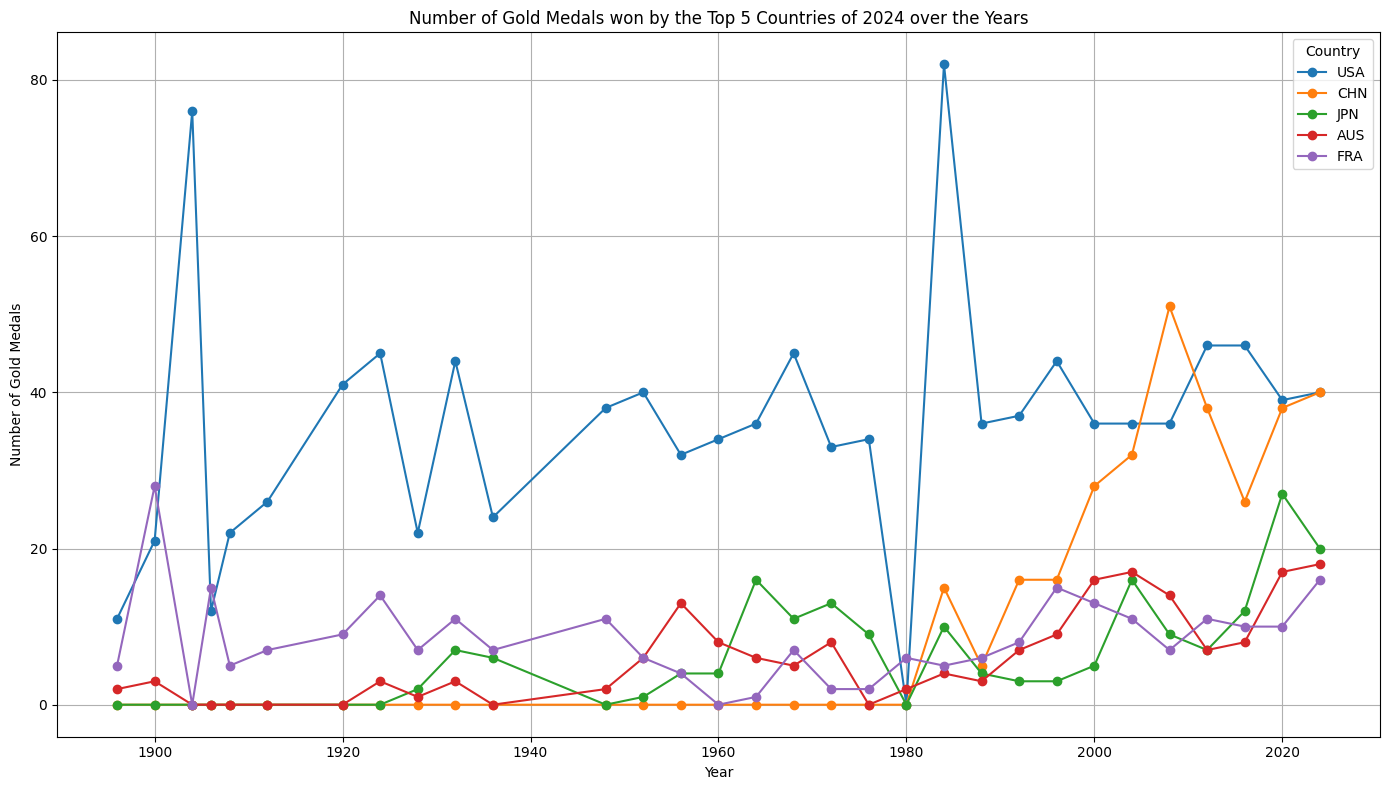

In [28]:
#Retrieving all data for top 5 countries of 2024
top_5_gold_df = olympic_df_final[olympic_df_final.NOC.isin(top_5_gold_2024.index)]

#Counting the number of gold medals for each of the top 5 countries over the years
gold_medals_count = top_5_gold_df.groupby(['Year','NOC'])['Gold'].sum().unstack(fill_value=0).reset_index()

#Creation of the graph
plt.figure(figsize=(14, 8))

country_labels = top_5_gold_2024.index

for label in country_labels:
    if label in gold_medals_count.columns:
        plt.plot(gold_medals_count['Year'], gold_medals_count[label], marker='o', label=label)

plt.xlabel('Year')
plt.ylabel('Number of Gold Medals')
plt.title('Number of Gold Medals won by the Top 5 Countries of 2024 over the Years')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()

On this first graph, we can already notice a certain dominance of the USA, which have been joined by China since the beginning of the 21st century.
Two questions, however : 
- What happened in 1980 ?
- Are the peaks for USA in 1904 and 1984 accurate ?

1. Regarding 1980, there was a boycott (the largest in Olympic history) initiated by the USA to protest against the Soviet invasion of Afghanistan. (https://en.wikipedia.org/wiki/1980_Summer_Olympics_boycott)
2. Regarding the peaks in 1904 and 1984, the US Olympic Team apparenlty won respectively 76 and 83 medals (https://olympics.com/fr/olympic-games/los-angeles-1984/medals & https://www.lequipe.fr/jeux-olympiques-ete/annee-1904/page-tableau-des-medailles/par-pays). Coincidentally, the Olympic Games of those two years were both held in the USA.

### Top 5 Countries by Total of Medals

In [29]:
#Retrieving the top 5 countries of 2024 Paris Olympics by total of medals
total_medals_2024_df = (olympic_df_final[olympic_df_final.Year == 2024]
 .groupby('NOC')
 .agg({'Gold':'sum', 'Silver':'sum', 'Bronze':'sum'}))

total_medals_2024_df['Total_Medals'] = total_medals_2024_df['Gold'] + total_medals_2024_df['Silver'] + total_medals_2024_df['Bronze']

top_5_total_2024 = total_medals_2024_df.sort_values(by='Total_Medals', ascending=False).head(5)
top_5_total_2024

,Gold,Silver,Bronze,Total_Medals
NOC,,,,
USA,40,44,42,126
CHN,40,27,24,91
GBR,14,22,29,65
FRA,16,26,22,64
AUS,18,19,16,53


*We can notice that it's almost the same top 5 as the previous one, with the exception of Great Britain instead of Japan.*

/var/folders/c7/lq_ffjtx6bs0_db04txqfl880000gn/T/ipykernel_22749/1982783429.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_total_df['Total_Medals'] = top_5_total_df['Gold'] + top_5_total_df['Silver'] + top_5_total_df['Bronze']


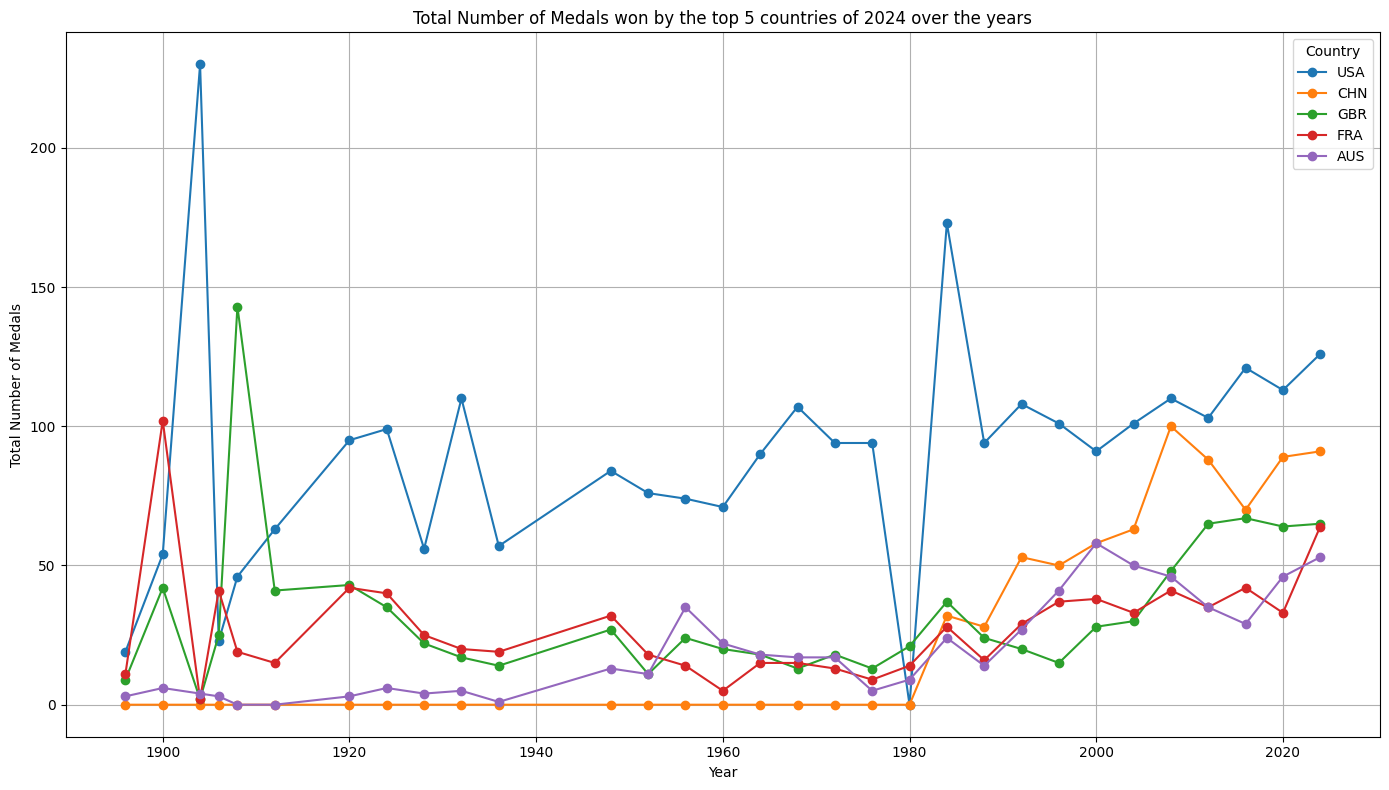

In [30]:
#Retrieving data for top 5 countries of 2024 and creating the column mentioning the total of medals
top_5_total_df = olympic_df_final[olympic_df_final.NOC.isin(top_5_total_2024.index)]
top_5_total_df['Total_Medals'] = top_5_total_df['Gold'] + top_5_total_df['Silver'] + top_5_total_df['Bronze']

#Counting the total number of medals for each of the top 5 countries over the years
total_medals_count = top_5_total_df.groupby(['Year','NOC'])['Total_Medals'].sum().unstack(fill_value=0).reset_index()

#Creation of the graph
plt.figure(figsize=(14, 8))

country_labels = top_5_total_2024.index

for label in country_labels:
    if label in total_medals_count.columns:
        plt.plot(total_medals_count['Year'], total_medals_count[label], marker='o', label=label) 

plt.xlabel('Year')
plt.ylabel('Total Number of Medals')
plt.title('Total Number of Medals won by the top 5 countries of 2024 over the years')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()

This second graph reinforces the idea of USA domination of the Olympic Games over the years. It can then be interesting to investigate a bit more the results of the USA for the past Olympic Games.

### USA Results over the last 10 Olympic Games 

In [31]:
#Retrieving the years of the 10 last Olympic Games
last_10_olympics = olympic_df_final.Year.sort_values(ascending=False).unique()[:10]

#Retrieving medals of the US team for the last 10 Olympics
usa_df = olympic_df_final[(olympic_df_final.NOC == 'USA') & (olympic_df_final.Year.isin(last_10_olympics))]
usa_medals_df = usa_df.groupby('Year').agg({'Gold':'sum', 'Silver':'sum', 'Bronze':'sum'})
usa_medals_df

,Gold,Silver,Bronze
Year,,,
1988,36,31,27
1992,37,34,37
1996,44,32,25
2000,36,24,31
2004,36,39,26
2008,36,39,35
2012,46,28,29
2016,46,37,38
2020,39,41,33


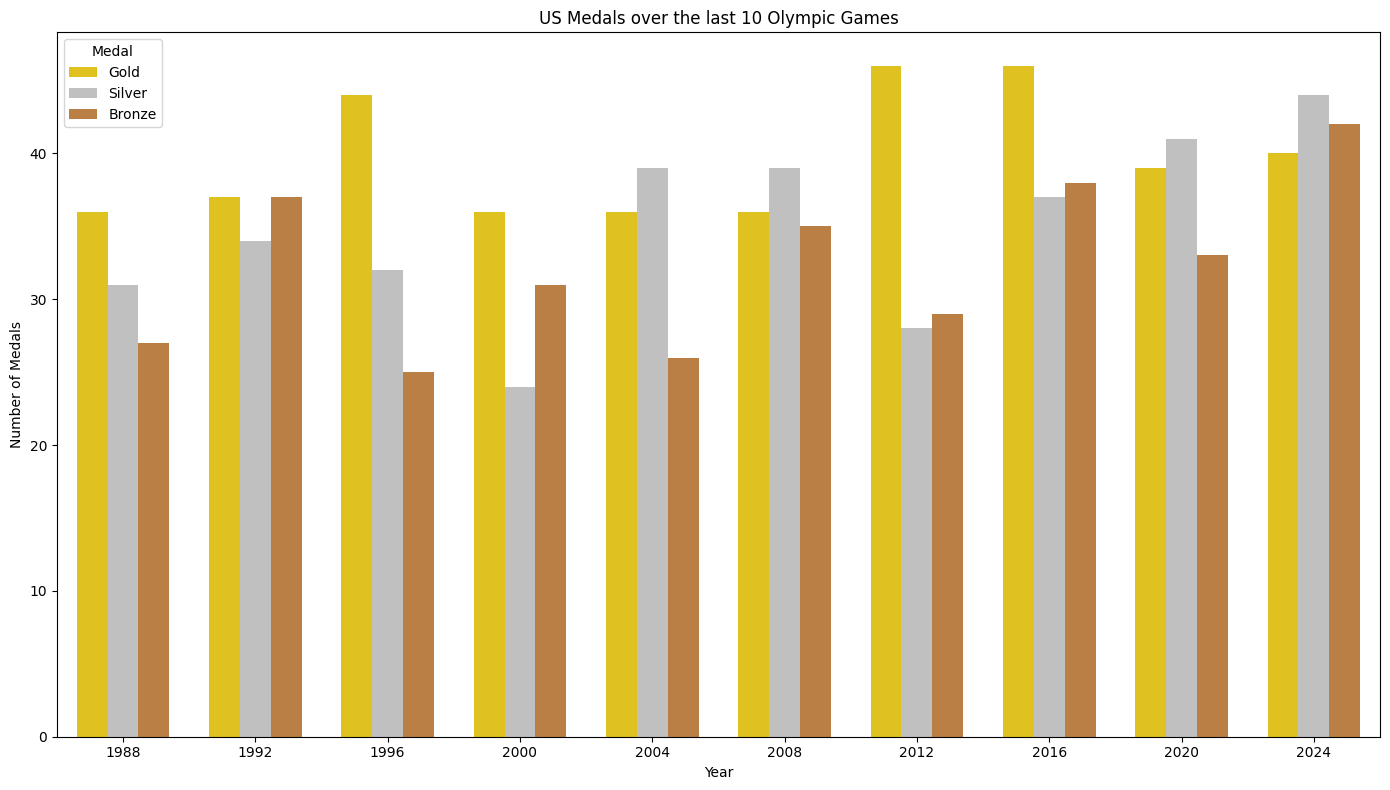

In [32]:
#Creation of the graph
plt.figure(figsize=(14, 8))
sns.barplot(data=usa_medals_df.unstack().reset_index(name='Medals'), 
            x='Year', 
            y='Medals', 
            hue='level_0', 
            palette={'Gold': 'gold', 'Silver': 'silver', 'Bronze': '#cd7f32'}, 
            width=.7)

plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.title('US Medals over the last 10 Olympic Games')
plt.legend(title='Medal')
plt.tight_layout()
plt.show()

In [33]:
gold_mean = np.mean(usa_medals_df.Gold.values)
silver_mean = np.mean(usa_medals_df.Silver.values)
bronze_mean = np.mean(usa_medals_df.Bronze.values)
total_mean = np.mean(usa_medals_df.Gold.values + usa_medals_df.Silver.values + usa_medals_df.Bronze.values)

print(f"The US Olympic Team has won on average {total_mean} medals over the last 10 Olympic Games, including {gold_mean} in gold, {silver_mean} in silver and {bronze_mean} in bronze")

The US Olympic Team has won on average 106.8 medals over the last 10 Olympic Games, including 39.6 in gold, 34.9 in silver and 32.3 in bronze


In [34]:
gold_std = np.std(usa_medals_df.Gold.values)
silver_std = np.std(usa_medals_df.Silver.values)
bronze_std = np.std(usa_medals_df.Bronze.values)
total_std= np.std(usa_medals_df.Gold.values + usa_medals_df.Silver.values + usa_medals_df.Bronze.values)

print(f"Standard deviation of the total of medals won per Olympic: {round(total_std,2)}")
print(f"Standard deviation of gold medals won per Olympic: {round(gold_std,2)}")
print(f"Standard deviation of silver medals won per Olympic: {round(silver_std,2)}")
print(f"Standard deviation of bronze medals won per Olympic: {round(bronze_std,2)}")

Standard deviation of the total of medals won per Olympic: 10.56
Standard deviation of gold medals won per Olympic: 4.0
Standard deviation of silver medals won per Olympic: 5.91
Standard deviation of bronze medals won per Olympic: 5.39


The graph and statistics above show not only the USA's good results over the last 10 Olympics, but also the **consistency** of these results over the years. This may already be a good indicator of their dominance. 

### Medals/Events Ratio Analysis

Although we noticed a certain dominance of the USA in the Olympics history, it might be interesting to analyze the number of medals won in relation to the number of events attented by country to check if the dominance is still accurate.

In [35]:
#Groupby to obtain one line per event per NOC
events_df = olympic_df_final[olympic_df_final.Year == 2024].groupby(['NOC','Year','Sport','Event']).agg({'Gold':'sum', 'Silver':'sum', 'Bronze':'sum'}).reset_index()
events_df.head(10)

,NOC,Year,Sport,Event,Gold,Silver,Bronze
0,AFG,2024,Athletics,Men's 100m,0,0,0
1,AFG,2024,Athletics,Women's 100m,0,0,0
2,AFG,2024,Cycling Road,Women's Individual Time Trial,0,0,0
3,AFG,2024,Cycling Road,Women's Road Race,0,0,0
4,AFG,2024,Judo,Men -81 kg,0,0,0
5,AFG,2024,Swimming,Men's 50m Freestyle,0,0,0
6,AIN,2024,Canoe Sprint,Men's Canoe Double 500m,0,0,0
7,AIN,2024,Canoe Sprint,Men's Canoe Single 1000m,0,0,0
8,AIN,2024,Canoe Sprint,Men's Kayak Single 1000m,0,0,0
9,AIN,2024,Canoe Sprint,Women's Canoe Single 200m,0,0,0


In [36]:
events_medals_df = events_df.groupby('NOC').agg({'Event':'count', 'Gold':'sum', 'Silver':'sum', 'Bronze':'sum'})
events_medals_df['Total_Medals'] = events_medals_df['Gold'] + events_medals_df['Silver'] + events_medals_df['Bronze']
events_medals_df.head(10)

,Event,Gold,Silver,Bronze,Total_Medals
NOC,,,,,
AFG,6,0,0,0,0
AIN,30,1,3,1,5
ALB,9,0,0,2,2
ALG,47,2,0,1,3
AND,4,0,0,0,0
ANG,10,0,0,0,0
ANT,5,0,0,0,0
ARG,48,1,1,1,3
ARM,16,0,3,1,4


In [37]:
events_medals_df['Medals_per_Events'] = round(events_medals_df['Total_Medals']/events_medals_df['Event'],4)
events_medals_df.sort_values(by='Medals_per_Events', ascending=False).head(10)

,Event,Gold,Silver,Bronze,Total_Medals,Medals_per_Events
NOC,,,,,,
KEN,24,4,2,5,11,0.4583
USA,275,40,44,42,126,0.4582
LCA,5,1,1,0,2,0.4000
CHN,237,40,27,24,91,0.3840
PRK,16,0,2,4,6,0.3750
KGZ,17,0,2,4,6,0.3529
GBR,195,14,22,29,65,0.3333
GRN,6,0,0,2,2,0.3333
IRI,38,3,6,3,12,0.3158


Surprisingly, first place in terms of medals per event attented goes narrowly to Kenya, ahead of the USA. We can notice a lot of countries with low number of event's attendance in the top 10 of this indicator, which rightly highlights the link between the number of events attented and the number of medals won. If we limit the minimal number of event attented for example (see below), we can now find the countries listed in the previous top 5 (top 5 by gold medals & top 5 by total of medals).

In [38]:
events_medals_df[events_medals_df.Event > 50].sort_values(by='Medals_per_Events', ascending=False).head(10)

,Event,Gold,Silver,Bronze,Total_Medals,Medals_per_Events
NOC,,,,,,
USA,275,40,44,42,126,0.4582
CHN,237,40,27,24,91,0.3840
GBR,195,14,22,29,65,0.3333
KOR,114,13,9,10,32,0.2807
FRA,267,16,26,22,64,0.2397
NED,148,15,7,12,34,0.2297
AUS,234,18,19,16,53,0.2265
JPN,200,20,12,13,45,0.2250
UZB,71,8,2,3,13,0.1831


### Medals/Population Ratio Analysis

Now that we have analysed the number of medals won by country in light of the number of event attented, it might also be interesting to analyse the number of medals won by country in light of its population.

<br> *Dataset downloaded from Kaggle : https://www.kaggle.com/datasets/dataanalyst001/world-population-by-country-2024*

In [39]:
world_population_df = pd.read_csv('Data/World Population by country 2024.csv')
world_population_df = world_population_df[['Country','Population 2024']].rename(columns={'Population 2024':'Population'})
world_population_df

,Country,Population
0,India,1441719852
1,China,1425178782
2,United States,341814420
3,Indonesia,279798049
4,Pakistan,245209815
...,...,...
229,Montserrat,4372
230,Falkland Islands,3803
231,Niue,1935
232,Tokelau,1915


In [40]:
#Adding population values for Kosovo and Guinea-Bissau
population_update = pd.DataFrame({'Country': ['Kosovo', 'Guinea-Bissau'],
                   'Population' : [1668371, 2207508]})

world_population_df = pd.concat([world_population_df, population_update]).sort_values(by='Population', ascending=False).reset_index(drop=True)

*Population extract from the following site on September, 23rd : https://populationtoday.com/fr/gw-guinea-bissau/*

In [41]:
country_noc_df = raw_data_df_final[raw_data_df_final.Year == 2024][['Team','NOC']].drop_duplicates()
country_noc_df = country_noc_df.rename(columns={'Team':'Country'})
country_noc_df

,Country,NOC
237673,Belgium,BEL
237674,Italy,ITA
237676,Australia,AUS
237677,Great Britain,GBR
237678,United States,USA
...,...,...
250607,Samoa,SAM
250702,DR Congo,COD
250772,Syria,SYR
250890,South Sudan,SSD


In [42]:
#Updating some countries to match with the population dataframe
country_dict = {'Great Britain': 'United Kingdom',
               'Hong Kong, China': 'Hong Kong',
               'Republic of Moldova': 'Moldova',
               'Chinese Taipei': 'Taiwan',
               'Cabo Verde': 'Cape Verde',
               'IR Iran': 'Iran',
               'Türkiye': 'Turkey',
               'Czechia': 'Czech Republic',
               "Côte d'Ivoire": 'Ivory Coast',
               'UA Emirates': 'United Arab Emirates',
               'St Kitts and Nevis': 'Saint Kitts and Nevis',
               'Congo': 'Republic of the Congo',
               'Virgin Islands, US': 'United States Virgin Islands',
               'StVincent&Grenadines': 'Saint Vincent and the Grenadines',
               'Sao Tome & Principe': 'Sao Tome and Principe',
               'Timor-Leste': 'Timor Leste',
               'Virgin Islands, B': 'British Virgin Islands',
               'Brunei Darussalam': 'Brunei',
               'Centr Afric Re': 'Central African Republic',
               'Bosnia & Herzegovina': 'Bosnia and Herzegovina',
               'Lao PDR': 'Laos',
               'DPR Korea': 'North Korea',
               'Korea': 'South Korea'
               }

country_noc_df = country_noc_df.replace({'Country':country_dict})

In [43]:
population_noc_df = pd.merge(country_noc_df, world_population_df, how='left', on='Country')
population_noc_df

,Country,NOC,Population
0,Belgium,BEL,11715774.0
1,Italy,ITA,58697744.0
2,Australia,AUS,26699482.0
3,United Kingdom,GBR,67961439.0
4,United States,USA,341814420.0
...,...,...,...
201,Samoa,SAM,228966.0
202,DR Congo,COD,105625114.0
203,Syria,SYR,24348053.0
204,South Sudan,SSD,11277092.0


In [44]:
#Checking the countries for which there was no match
population_noc_df[population_noc_df['Population'].isna()]['Country'].unique()

array(['AIN', 'EOR'], dtype=object)

All the countries match properly since :
- AIN : Individual Neutral Athletes
- EOR : Refugee Olympic Team

In [45]:
#Merging population and medals data
population_medals_df = pd.merge(total_medals_2024_df.reset_index(), population_noc_df, how='left', on='NOC')
population_medals_df = population_medals_df[~population_medals_df['Population'].isna()].reindex(columns=['Country', 'NOC', 'Population', 'Gold', 'Silver', 'Bronze', 'Total_Medals'])
population_medals_df['Population'] = population_medals_df['Population'].astype(int)
population_medals_df.head(10)

,Country,NOC,Population,Gold,Silver,Bronze,Total_Medals
0,Afghanistan,AFG,43372950,0,0,0,0
2,Albania,ALB,2826020,0,0,2,2
3,Algeria,ALG,46278751,2,0,1,3
4,Andorra,AND,80341,0,0,0,0
5,Angola,ANG,37804634,0,0,0,0
6,Antigua and Barbuda,ANT,94816,0,0,0,0
7,Argentina,ARG,46057866,1,1,1,3
8,Armenia,ARM,2777979,0,3,1,4
9,Aruba,ARU,106177,0,0,0,0
10,American Samoa,ASA,43544,0,0,0,0


In [46]:
#Top 10 countries based on their number of medals per inhabitant
medals_per_inhabitant_df = population_medals_df.assign(
    Medals_per_Inhabitant = population_medals_df['Total_Medals']/population_medals_df['Population']).sort_values(by='Medals_per_Inhabitant', ascending=False).reset_index(drop=True)
medals_per_inhabitant_df.head(10)

,Country,NOC,Population,Gold,Silver,Bronze,Total_Medals,Medals_per_Inhabitant
0,Grenada,GRN,126887,0,0,2,2,0.000016
1,Dominica,DMA,73368,1,0,0,1,0.000014
2,Saint Lucia,LCA,180805,1,1,0,2,0.000011
3,New Zealand,NZL,5269939,10,7,3,20,0.000004
4,Bahrain,BRN,1498712,2,1,1,4,0.000003
5,Jamaica,JAM,2824738,1,3,2,6,0.000002
6,Australia,AUS,26699482,18,19,16,53,0.000002
7,Netherlands,NED,17671125,15,7,12,34,0.000002
8,Hungary,HUN,9994993,6,7,6,19,0.000002
9,Georgia,GEO,3717425,3,3,1,7,0.000002


In [47]:
medals_per_inhabitant_df[medals_per_inhabitant_df.Total_Medals > 0].tail(10)

,Country,NOC,Population,Gold,Silver,Bronze,Total_Medals,Medals_per_Inhabitant
80,Uganda,UGA,49924252,1,1,0,2,4.006069e-08
81,Mexico,MEX,129388467,0,3,2,5,3.864332e-08
82,Ivory Coast,CIV,29603302,0,0,1,1,3.378002e-08
83,Philippines,PHI,119106224,2,0,2,4,3.358347e-08
84,Ethiopia,ETH,129719719,1,3,0,4,3.083571e-08
85,Peru,PER,34683444,0,0,1,1,2.883220e-08
86,Egypt,EGY,114484252,1,1,1,3,2.620448e-08
87,Indonesia,INA,279798049,2,0,1,3,1.072202e-08
88,India,IND,1441719852,0,1,5,6,4.161696e-09
89,Pakistan,PAK,245209815,1,0,0,1,4.078140e-09


In [48]:
medals_per_inhabitant_df[medals_per_inhabitant_df.NOC == 'USA']

,Country,NOC,Population,Gold,Silver,Bronze,Total_Medals,Medals_per_Inhabitant
47,United States,USA,341814420,40,44,42,126,3.686211e-07


Logically enough, we see a majority of countries with small populations in the top 10, despite a low number of medals won.  As for the USA, it ranks only 41st regarding this indicator.

### Sports over the Years

In [49]:
sport_year_df = raw_data_df_final[['Year', 'Sport']].drop_duplicates()
sport_count_df = sport_year_df.groupby('Sport').size().sort_values(ascending=False).reset_index(name='Count')

#Getting rid of the 'double' sport
sport_count_df = sport_count_df[~sport_count_df.Sport.str.contains(',')]
sport_count_df

,Sport,Count
0,Athletics,31
1,Swimming,31
2,Fencing,31
3,Wrestling,30
4,Rowing,30
...,...,...
68,Ice Hockey,1
70,Roque,1
72,Karate,1
73,Motorboating,1


In [50]:
#Number of Olympic Games represented in this dataset
number_of_olympics = len(raw_data_df_final.Year.unique())

print(f'Number of Olympics represented in this dataset : {number_of_olympics}')
print('Top 10 sports represented at the Olympics over the years :')
print(sport_count_df.head(10))

Number of Olympics represented in this dataset : 31
Top 10 sports represented at the Olympics over the years :
        Sport  Count
0   Athletics     31
1    Swimming     31
2     Fencing     31
3   Wrestling     30
4      Rowing     30
5     Cycling     29
6    Football     29
7  Gymnastics     29
8      Diving     29
9  Water Polo     29


*Only 3 sports were represented over all the 31 Olympics : Atheltics, Swimming, Fencing.*

In [51]:
sport_count_df[sport_count_df.Count == 1]

,Sport,Count
59,Baseball/Softball,1
60,Aeronautics,1
61,Jeu De Paume,1
63,Breaking,1
64,Croquet,1
65,Cricket,1
67,Basque Pelota,1
68,Ice Hockey,1
70,Roque,1
72,Karate,1


*In the other hand, some sports (way less popular) have only been represented once during the Olympics.*

### Gender Distribution Analysis

In [52]:
gender_df = raw_data_df_final[['Sex', 'Year', 'Name']].drop_duplicates()
gender_df

,Sex,Year,Name
0,M,1992,A Dijiang
1,M,2012,A Lamusi
2,M,1920,Gunnar Aaby
3,M,1900,Edgar Aabye
4,F,1932,Cornelia (-strannood)
...,...,...,...
252574,M,2024,Elijah Joseph
252575,F,2024,Khrystyna Homan
252576,F,2024,Chemengich Chelangat
252577,F,2024,Sefora Ada


In [53]:
#Gender Distribution per Olympics' Year
gender_distrib = gender_df.groupby(['Year', 'Sex']).size()
gender_distrib.unstack(fill_value=0).head(10)

Sex,F,M
Year,,
1896,0,176
1900,23,1192
1904,6,636
1906,6,832
1908,44,1964
1912,53,2333
1920,78,2582
1924,156,3088
1928,312,2926


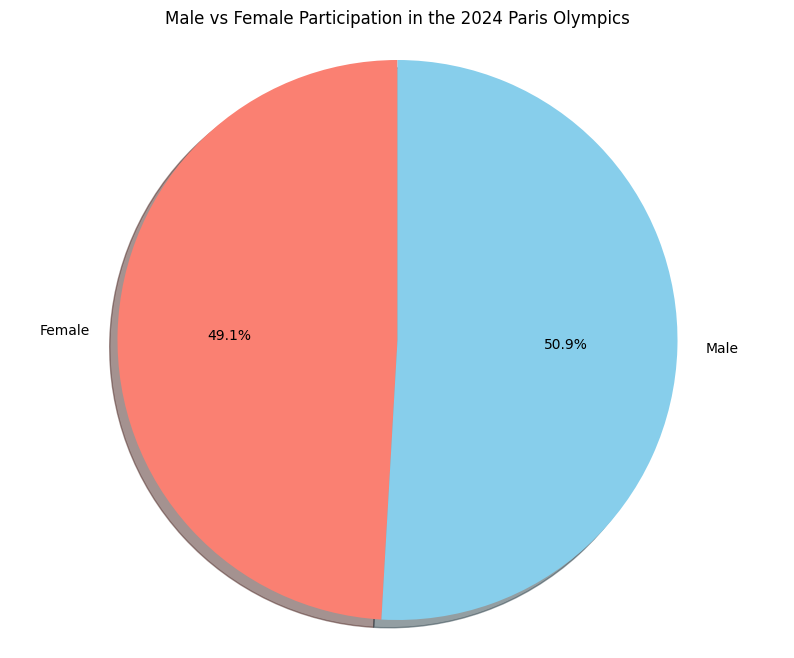

In [54]:
#Data for the graph
labels = ['Female','Male']
sizes = gender_distrib.loc[2024].values
colors = ['salmon','skyblue']

# Graph Creation
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.axis('equal')
plt.title('Male vs Female Participation in the 2024 Paris Olympics')

plt.show()

During 2024 Paris Olympics, it seems that there was more or less the same number of female participants than male participants. But was it always the case over the years ? 

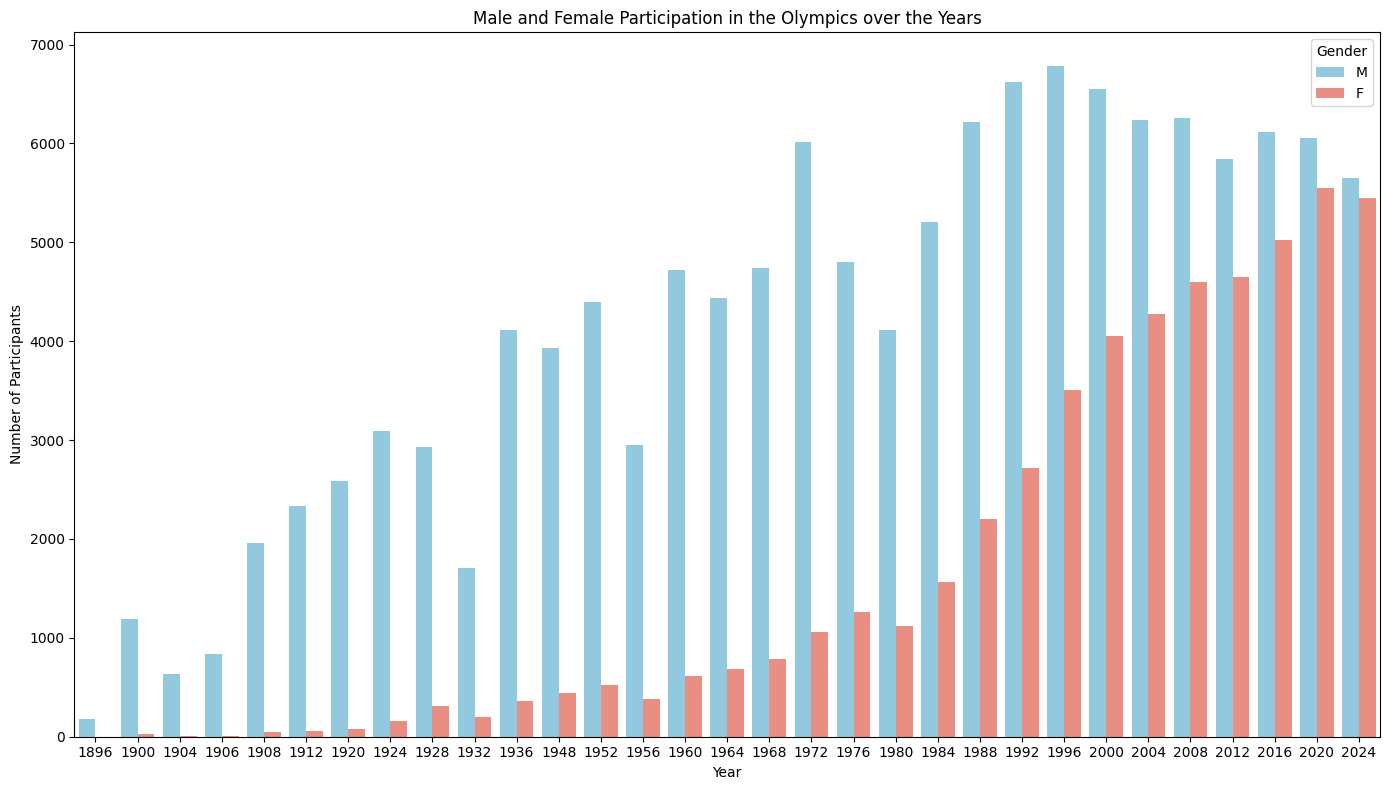

In [55]:
#Graph Creation
plt.figure(figsize=(14, 8))
sns.barplot(data=gender_distrib.reset_index(name='number_of_participants'), x='Year', y='number_of_participants', hue='Sex', palette={'M': 'skyblue', 'F': 'salmon'})

plt.xlabel('Year')
plt.ylabel('Number of Participants')
plt.title('Male and Female Participation in the Olympics over the Years')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

As we could have imagined, the parity male/female has not always been respected in the Olympics history. But we can notice a positive increase in the number of female participants over the last editions, leading to near parity by 2024.

In [56]:
gender_medals_df = raw_data_df_final[raw_data_df_final.Medal != 'No medal'][['Sex', 'NOC', 'Year', 'Sport', 'Event','Medal']].drop_duplicates()
gender_medals_df = gender_medals_df.groupby(['Year', 'Sex']).size().unstack(fill_value=0).reset_index()

gender_medals_df.head(10)

Sex,Year,F,M
0,1896,0,120
1,1900,13,281
2,1904,7,272
3,1906,6,221
4,1908,16,308
5,1912,21,301
6,1920,32,421
7,1924,34,360
8,1928,46,312
9,1932,44,326


In [57]:
gender_medals_df['Total'] = gender_medals_df['F'] + gender_medals_df['M']

gender_medals_df = gender_medals_df.assign(
    F_Percentage = (gender_medals_df['F']/gender_medals_df['Total'])*100,
    M_Percentage = (gender_medals_df['M']/gender_medals_df['Total'])*100,
    Total_Percentage = (gender_medals_df['Total']/gender_medals_df['Total'])*100).drop(columns=['F', 'M', 'Total'])

gender_medals_df.tail(10)

Sex,Year,F_Percentage,M_Percentage,Total_Percentage
21,1988,30.955585,69.044415,100.0
22,1992,34.271726,65.728274,100.0
23,1996,36.780259,63.219741,100.0
24,2000,40.728832,59.271168,100.0
25,2004,42.369264,57.630736,100.0
26,2008,42.665289,57.334711,100.0
27,2012,44.295992,55.704008,100.0
28,2016,45.298281,54.701719,100.0
29,2020,48.220641,51.779359,100.0
30,2024,48.811700,51.188300,100.0


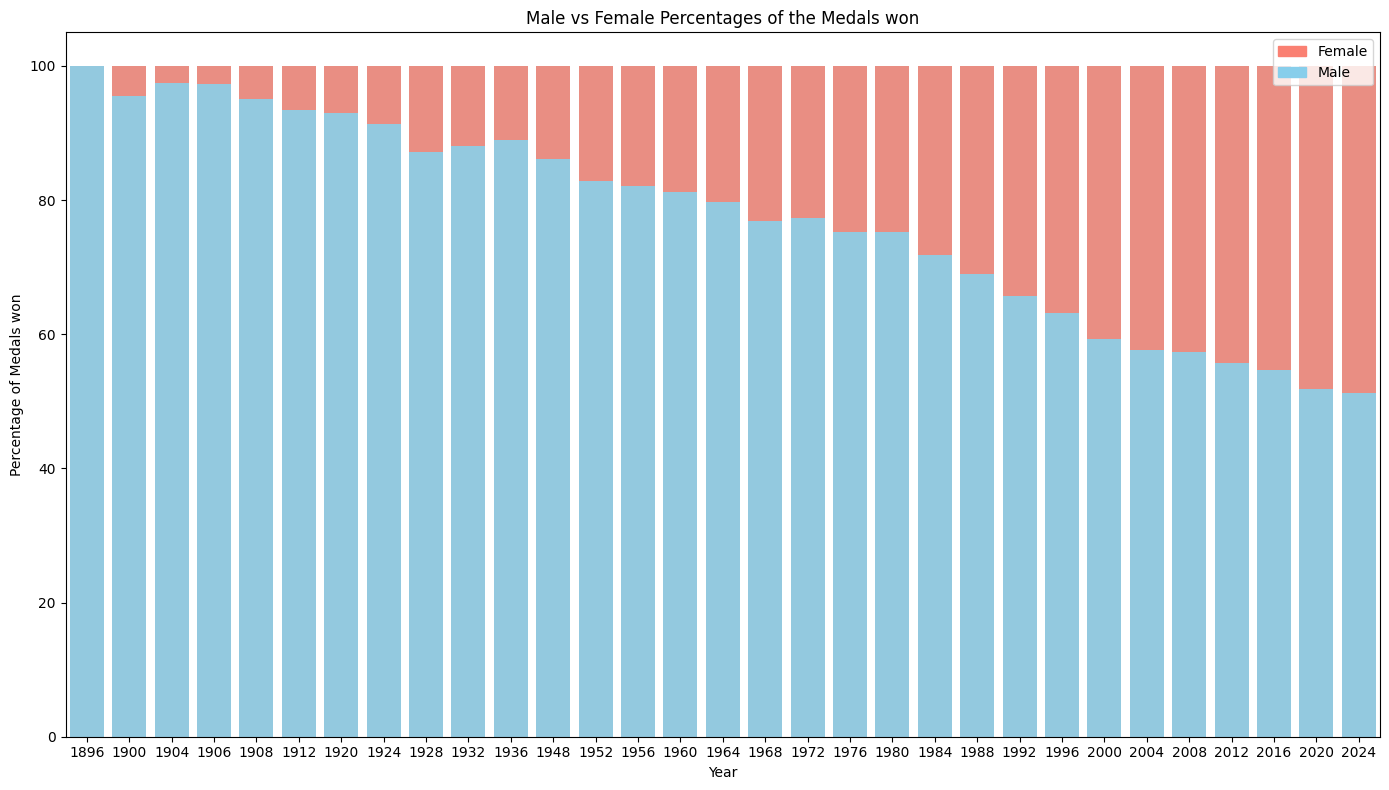

In [58]:
#Creation of the graph
plt.figure(figsize=(14, 8))

#bar chart 1 -> top bars
ax1 = sns.barplot(x="Year",  y='Total_Percentage', data=gender_medals_df, color='salmon')

# bar chart 2 -> bottom bars
ax2 = sns.barplot(x="Year", y="M_Percentage", data=gender_medals_df, color='skyblue')

# add legend
plt.xlabel('Year')
plt.ylabel('Percentage of Medals won')
plt.title('Male vs Female Percentages of the Medals won')
plt.tight_layout()
top_bar = mpatches.Patch(color='salmon', label='Female')
bottom_bar = mpatches.Patch(color='skyblue', label='Male')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()


Obviously the percentage of medals won by each gender is linked to the number of participants of each gender. As we noticed previously, the number of female participants was low for a long time but significantly increased in the last editions of the Olympics. This trend is also noticeable in the evolution of the percentage of medals won by female participants. 